## Load libraries

In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

## Fetch image from folders

In [2]:
count = 0
dirs = os.listdir("train/")
for dir in dirs:
    files = list(os.listdir("train/" + dir))
    print( dir + " folder has " + str(len(files)) + " images")
    count = count + len(files)

print("\n\ntrain folder has " + str(count) + " images")

astilbe folder has 726 images
bellflower folder has 872 images
black_eyed_susan folder has 986 images
calendula folder has 1011 images
california_poppy folder has 1021 images
carnation folder has 924 images
common_daisy folder has 978 images
coreopsis folder has 1035 images
dandelion folder has 1038 images
iris folder has 1041 images
rose folder has 986 images
sunflower folder has 1013 images
tulip folder has 1034 images
water_lily folder has 977 images


train folder has 13642 images


## Load images into arrays as Dataset

In [3]:
train_dir = "train/"
img_size = 256
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( train_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = "training",
                                                       batch_size = batch,
                                                       image_size = (img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( train_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = "validation",
                                                       batch_size = batch,
                                                       image_size = (img_size, img_size)) 

Found 13642 files belonging to 14 classes.
Using 10914 files for training.
Found 13642 files belonging to 14 classes.
Using 2728 files for validation.


In [5]:
flower_names = train_ds.class_names
flower_names

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

In [6]:
import matplotlib.pyplot as plt

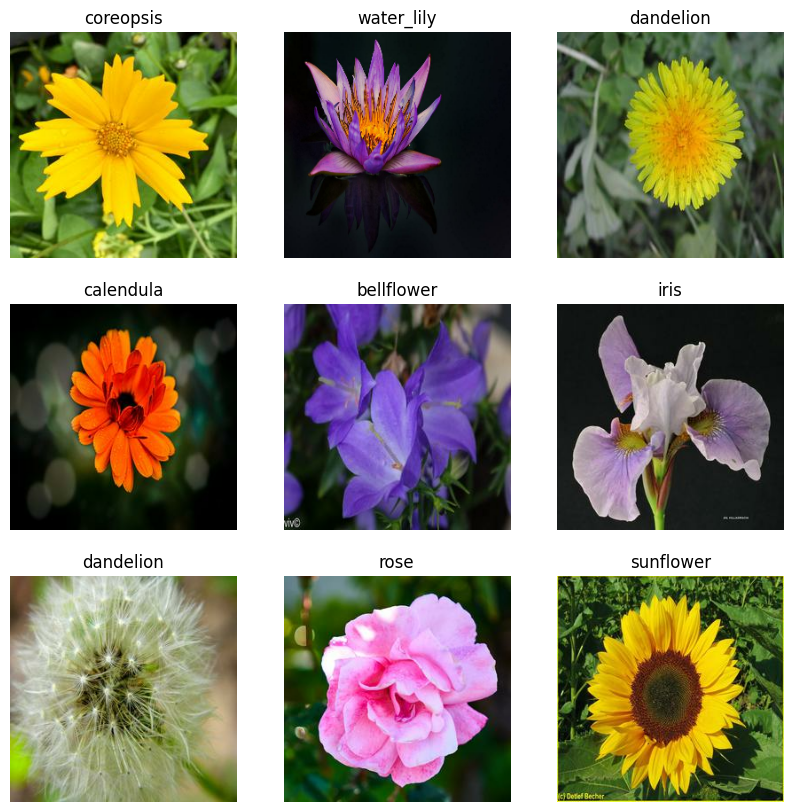

In [7]:
# i = 0
plt.figure(figsize = (10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## Data augmentation

In [11]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


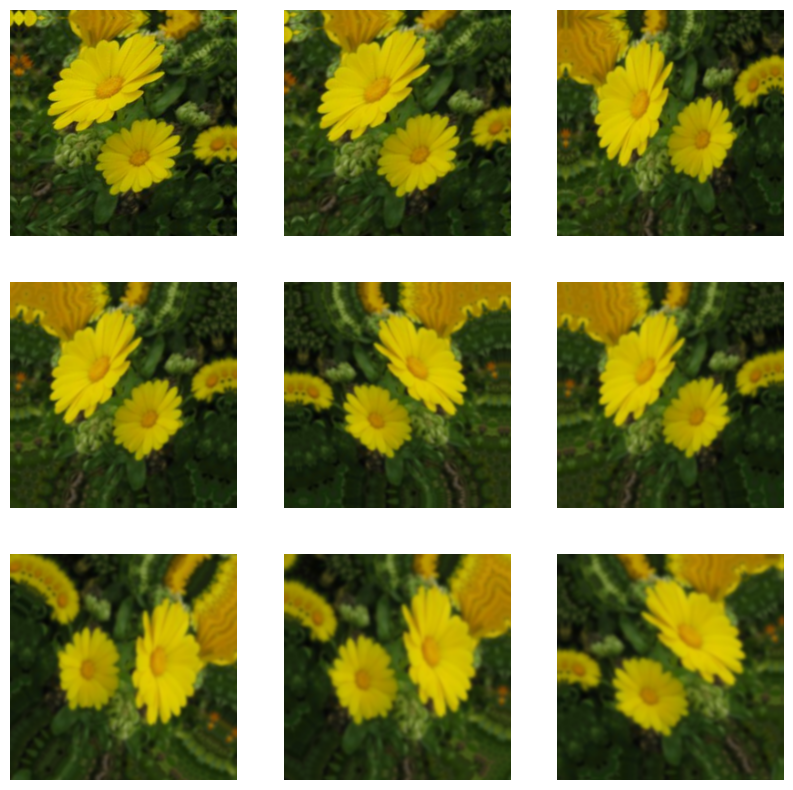

In [12]:
# i = 0
plt.figure(figsize = (10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis('off')

## Model Creation and Training

In [12]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding = "same", activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding = "same", activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = "same", activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(14)
])

In [13]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
             )

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)       

In [15]:
history = model.fit(train_ds, epochs = 15, validation_data = val_ds)

Epoch 1/15
342/342 [==============================] - 104s 193ms/step - loss: 1.7584 - accuracy: 0.3898 - val_loss: 1.4576 - val_accuracy: 0.4974
Epoch 2/15
342/342 [==============================] - 68s 198ms/step - loss: 1.3324 - accuracy: 0.5392 - val_loss: 1.2041 - val_accuracy: 0.5883
Epoch 3/15
342/342 [==============================] - 50s 147ms/step - loss: 1.1255 - accuracy: 0.6133 - val_loss: 1.0783 - val_accuracy: 0.6397
Epoch 4/15
342/342 [==============================] - 41s 120ms/step - loss: 1.0057 - accuracy: 0.6551 - val_loss: 1.0377 - val_accuracy: 0.6617
Epoch 5/15
342/342 [==============================] - 40s 118ms/step - loss: 0.9136 - accuracy: 0.6886 - val_loss: 0.9988 - val_accuracy: 0.6767
Epoch 6/15
342/342 [==============================] - 41s 121ms/step - loss: 0.8432 - accuracy: 0.7118 - val_loss: 0.9467 - val_accuracy: 0.6888
Epoch 7/15
342/342 [==============================] - 39s 114ms/step - loss: 0.7770 - accuracy: 0.7326 - val_loss: 0.9491 - val_a

In [2]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(256,256))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)
    
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = "The image belongs to " + flower_names[np.argmax(result)] + " with a score of " + str(max(result) * 100)
    return flower_names[np.argmax(result)]

In [17]:
model.save("Flower_Recognition_Model.h5")

## Load Model and Test

In [3]:
model = load_model('Flower_Recognition_Model.h5')
flower_names = ['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

In [4]:
countTotalFileTest = 0
countTotalCorrect = 0
dirs = os.listdir("test/")
for dir in dirs:
    files = list(os.listdir("test/" + dir))
    for file in files:
        resultPredict = classify_images("test/" + dir + "/" + file);
        if(resultPredict == dir):
            countTotalCorrect += 1
    countTotalFileTest = countTotalFileTest + len(files)

print("Accuracy in test samples: " + str(countTotalCorrect / countTotalFileTest))

Accuracy in test samples: 0.7755102040816326
